# Page Turners of the Decade. A Journey to unravel the Secrets of the Best-Selling Books

In this fast paced evolving world we live in, books have remained not just a source of entertainment and knowledge but a reflection of so many of our ever changing interests and preferences. In a market filled with so many different genres and over a million authors yarning for readers attention, understanding how these different books and genres resonate with readers becomes not only just fascinating but crucial.

This project dives into the world of literature and it's dynamic and my main goal is to unravel how various genres and authors are looked at or perceived in the eyes of those who matter the most that is us the readers(wink). It's an exploration into the trends and preferences that have defined a whole decaded of reading habits.

Join me as I embark on this amazing journey seeking to organize and analyze data to unravel the question, 

## Which books have captivated the hearts and minds of readers over the past decade and what makes these titles stand out in the vast space of literature.


## Here's a breakdown or my Table of Content

### Problem Definition

How can we determine which book genre or author stands out in the market based on reader preferences and trends?

Source of Data

Definitions and what we'll be measuring 

### Data Collection

Ethics(why I choose to use this specfic dataset)

### Data Preprocessing, Analyzing and Summary

Checking Data and examining the DataFrame

Cleaning and preprocessing as needed

Visual Analysis and viewing the data from charts and word clouds for Exploratory Data Analysis

Author Analysis

Price Analysis

Correlation Analysis

Summarizing key findings

### Assessment 

Metrics

My Final Thoughts

## Problem Definition

### How can we determine which book genre or author stands out in the market based on reader preferences and trends?

In tackling the challenge of identifying which genre of books is favoured in the market from the perspective of the readers my first step obviously would be to select a relaibale source of data. The right sources are usually those that have responses rich with emotions from the readers.

Next thing was to define the key metrics to analyze like popularity of the different genres, the notability of authors and the readers ratings whichn are all very crucial and important

Finally the last problem was to simply gather, organize and analyzise the data

### Source of Data

I looked around different places but overall all in the best way to deduce this type of question is through getting premium data from one of the best platforms out there and since my project is based off books I decided to look for data coming specfically from Amazon although after reading their new terms and conditions they have in place I got to realize they had tightened their policies around scraping their data with consequences of being banned. However I still tried to maybe scrape a few reviews for my project but they were all in vein as they're anti-scrapping features were too lethal for me to extract the right class attributes. However, thanks to the kaggle website I was able to find a dataset scrapped from Amazon in an excel file containing it's Top 50 Bestselling Books from 2009-2019 that was scrapped on October 2020 by a kaggle user who goes by the name Sooter Saalu who was kind enough to put up the data in the public domain free of use for people to utlilize it


### What I'm Measuring

With the data available, I had to define what I'm measuring to provide a more clearer picture of what I'm trying to do

1. Genre Popularity: basically here I'll be assessing which genre's are most poopular among the readers based of the frequency of the books 
2. Author Notability: which authors frequently appear on the best sellers list and their overall presence in the market
3. Reader Ratings: analyzing the average ratings given to each book which ofcourse reflects the users satisfaction and reception to it
4. Price Trends: observing how the pricing of books across different genres or even different authors has varied and it's potential impact on sales 
5. Year trends: identifying any significant year to year changes in the metrics above to understand how the reader preferences and market trends have evolved over the past decade.

### Data Collection

#### The What
I made a decision to look for data from Amazon and I was lucky enough to get an excel file off kaggle from a generous user called Sooter Saalu who's link I will provide at the end of my assessment.
Data is in an excel file and it contains data for Amazon's Top 50 Bestselling Books 2009 - 2019 and it contains of book names, author, user ratings, price, year and genre

#### How
This was pretty simple and didn't necessarily require any very technical techniques. I just downloaded the excel file from kaggle that was uploaded to the public domain by Sooter Saul.

### Data Preprocessing, Analyzing and Summary

The csv file is already available so from this point I'll get right to looking at the data by first importing the libraries I need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#This line ensures that graphs are displayed within your Jupyter Notebook
%matplotlib inline

From here we import the data into pandas Dataframe

In [2]:
df = pd.read_csv('/kaggle/input/bestsellers-with-categories/bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Now let's try to explore some information about our Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [5]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [6]:
df.shape

(550, 7)

Now that we've imported and run the data we can move on to the next thing

#### Cleaning and Preprocessing as needed 

First we'll check for any missing values in the dataset

In [7]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Luckily the dataset has no missing values
However if it did we'd have several options we could use to handle the set missing values like

#### Fill with Mean/Median
This is for numerical columns, we can fill missing values with the mean or median 
Here's a simple demonstration let's say the prices column was missing some data

In [8]:
#df['column_name'] = df['column_name'].fillna(df['column_name'].mean())

Now let's check for duplicates 

In [9]:
df = df.drop_duplicates()

Now let's ensure each column is of the correct data type for the analysis

In [10]:
df['Year'] = df['Year'].astype(int)
df['Price'] = df['Price'].astype(float)

The Data all looks pretty clean from this point so, everything looks okay and there seems to be no need for cleaning it but just had to make sure so now on to the next thing

####  Visualization and viewing the Data from charts

#### First we'll need to install WordCloud in our Python Environment, luckily we can install it directly by running the cell below with the command, please uncomment it and run it in order to install the packages

In [11]:
#!pip install wordcloud


Now we can import the libraries

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline 

Great, now we can start using charts to visualize the data

### Genre Popularity

First, we'll be looking at which genre of books is the more popular and in order to visualize this I'll need to draw a chart that would be able clear display the different between the number of books between the different genres and for this I chose to go with a Bar Chart.

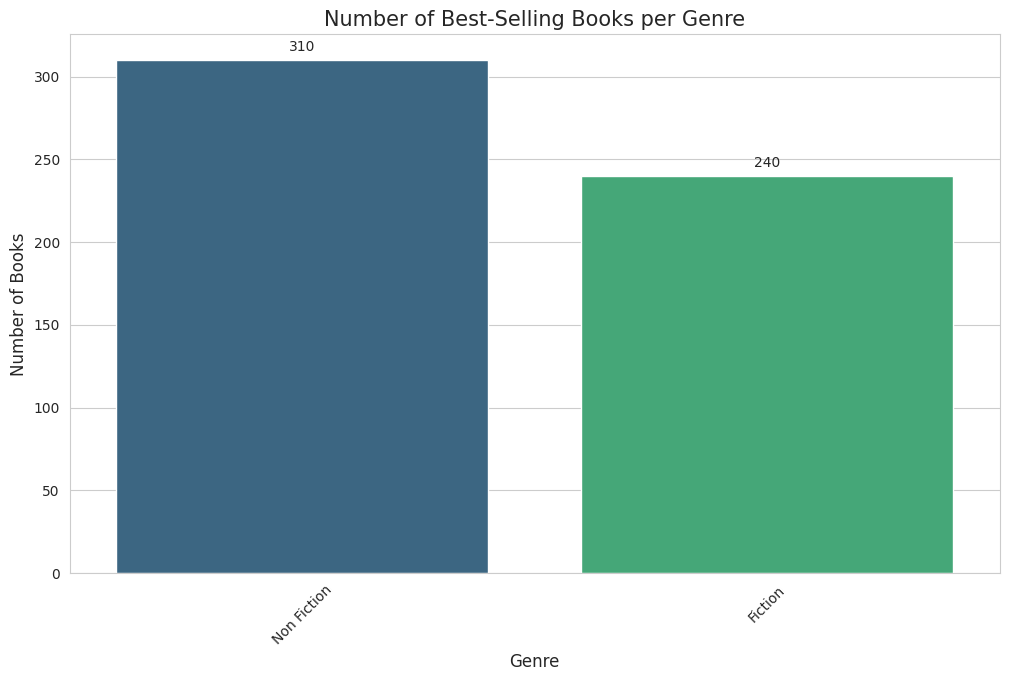

In [13]:
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
genre_counts = df['Genre'].value_counts()
bar = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Best-Selling Books per Genre', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.xticks(rotation=45)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')
plt.show()


### Analysis of the Graph 
From the bar chart we can clearly see non fictional books have a higher count than the fictional books which simply indicates readers had a preference for more informational books like self help a perfect example of books that came out that time is The Becoming by Michelle Obama which made headlines and was talked about alot from the time of release.


### User Ratings Analysis

Next Up I want to look at the User Ratings, I understand this is a trend thats continously changing over the years between 2009 and 2019. I decided to use a Line chart to visualize this and show the Average User Ratings of the books over the decade.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


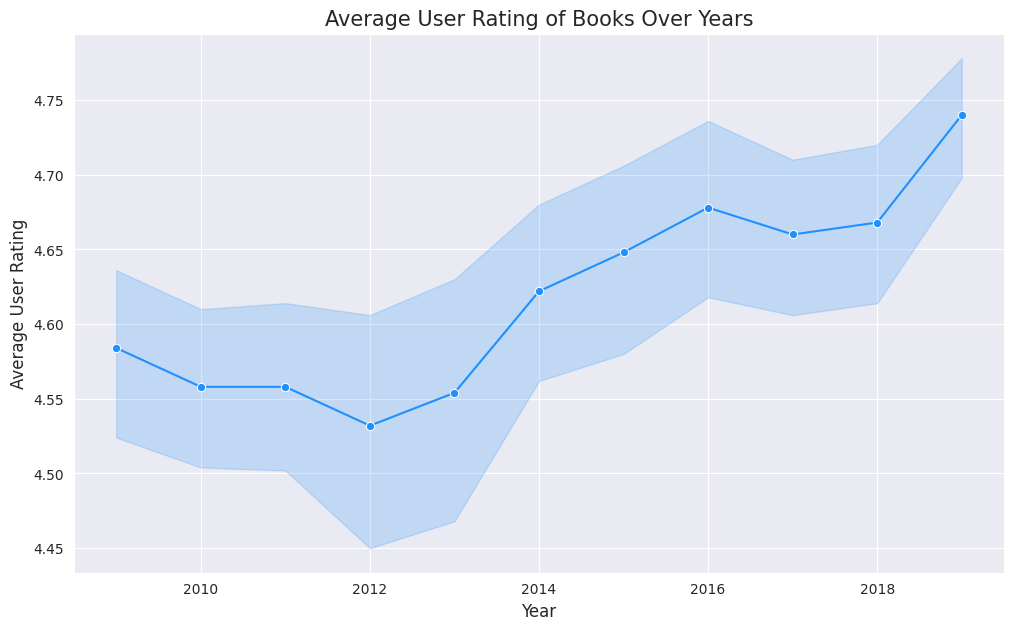

In [14]:
plt.figure(figsize=(12, 7))
sns.set_style('darkgrid')
sns.lineplot(x='Year', y='User Rating', data=df, marker='o', color='dodgerblue')
plt.title('Average User Rating of Books Over Years', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average User Rating', fontsize=12)
plt.grid(True)

# Adding a specific annotation
plt.annotate('Peak Rating', xy=(2015, 4.8), xytext=(2016, 4.7),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


As you can see with the line graph, the User Ratings started off by delining throughout to below 4.55 and it reached it's lowest point in 2012.This could mainly have been due to poor publishing quality and also the type of books that were best-sellers at this time maybe didn't really capture the attention of readers. After hitting this point it gradually started increasing till 2016 were it slowly plumpted a litle bit but then later on picked up and proceeded to rise and get to it's highest point after 2018

### Distribution of Book Prices
Next Up I want to look at the prices and for this I decided to use a histogram to visualize the distribution of book prices in the dataset. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


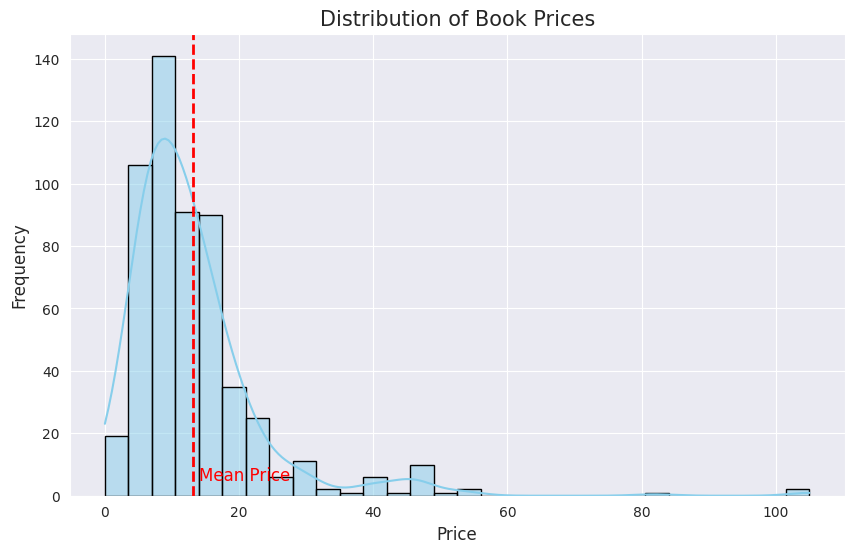

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, edgecolor='black', color='skyblue')
plt.title('Distribution of Book Prices', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['Price'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.text(x=df['Price'].mean()+1, y=5, s='Mean Price', color='red', fontsize=12)
plt.show()

The histogram is created with 'histplot' function where the 'bins' is set to 30 dividing the price range into segments inorder to provide a detailed view of the distribution.
We can clearly see the mean price for books is quite low and these low prices can be an indication of very competitive book pricing strategies in the book market. This could suggest the top book authors and publishers really try to be fair with readers and give them quite the value for their money 

### Simple Word Cloud

Next thing is Word Cloud, these can be particularly usefulfor visualizing the most frequent words in authors


In [16]:
import pandas as pd
df = pd.read_csv('/kaggle/input/bestsellers-with-categories/bestsellers with categories.csv')
text = ' '.join(book for book in df['Author'])

then, we genrate the word cloud

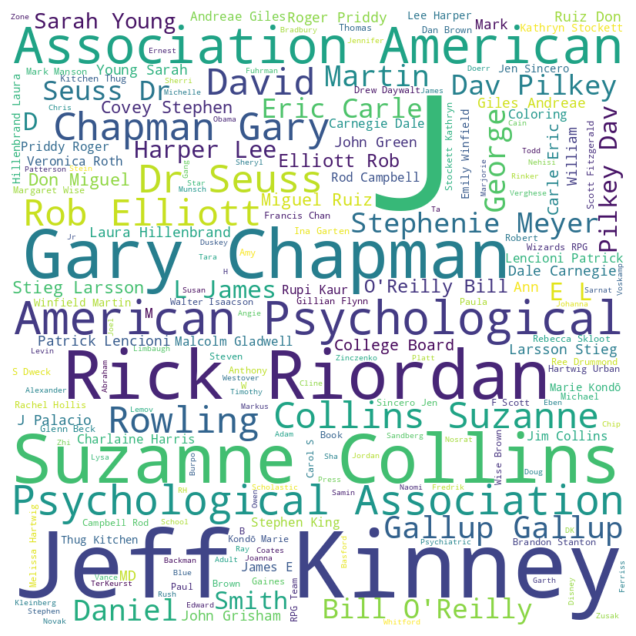

In [17]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


We can already now see a couple names that seem to be frequent for example Jeff Kinney and Gary Chapman, I'm curious to see if they happen to have multiple books appear in this dataset. That is something we'll get analysize quite more of in detail later on in this project

## Author Analysis

For the Author Analysis I intend to compute scores for the authors from the entire Dataset and the process is simply going to involve analyzing the entire dataset to find out the impact of each author based on the number of times they appear in the dataset and the ratings of their books

To do this I'm first of all going to calculate how many times each of the authors appears in the dataset to give me a clear indication of their presence in the list
Next I will calculate the average ratings for each one of these authors to really reflect how well their books are received by the customers/readers


Let's startoff by counting the appearance of each other

In [18]:
appearance_counts = df[('Author')].value_counts()

Next let's calculate the average rating of each author

In [19]:
average_ratings = df.groupby('Author')['User Rating'].mean()

Now let's create a Dataframe with both metrics

In [20]:
author_scores = pd.DataFrame({
    'appearance_count': appearance_counts,
    'average_rating': average_ratings
})

Now we can create a combined scores by multipying the counts by the average ratings.
Next up will be sorting the authors by the combined scores 
Finally just printing out the details

In [21]:
# You can create a combined score, e.g., by multiplying the counts by the average ratings
author_scores['combined_score'] = author_scores['appearance_count'] * author_scores['average_rating']

# Sorting authors by the combined score
author_scores = author_scores.sort_values(by='combined_score', ascending=False)

print(author_scores.head(10))




                                    appearance_count  average_rating  \
Author                                                                 
Jeff Kinney                                       12        4.800000   
Rick Riordan                                      11        4.772727   
Gary Chapman                                      11        4.736364   
Suzanne Collins                                   11        4.663636   
American Psychological Association                10        4.500000   
Dr. Seuss                                          9        4.877778   
Rob Elliott                                        8        4.562500   
Gallup                                             9        4.000000   
Dav Pilkey                                         7        4.900000   
Eric Carle                                         7        4.900000   

                                    combined_score  
Author                                              
Jeff Kinney                  

After looking at the output from this code, I took it upon myself to try and create a much more appealing display of data just to really test my skillset so the table below is pretty much the same output as what I just did previously and it's purpose was just mainly to make the output look nice in a table

In [22]:

# My dataset
df = pd.read_csv('/kaggle/input/bestsellers-with-categories/bestsellers with categories.csv')

# Count appearances and calculate average ratings
appearance_counts = df['Author'].value_counts()
average_ratings = df.groupby('Author')['User Rating'].mean()

# A DataFrame for Author scores
Author_scores = pd.DataFrame({
    'Appearance Count': appearance_counts, 
    'Average Rating': average_ratings
})

# Calculate combined score
Author_scores['Combined Score'] = Author_scores['Appearance Count'] * Author_scores['Average Rating']
Author_scores.reset_index(inplace=True)
Author_scores.rename(columns={'index': 'Author'}, inplace=True)

# Sorting by 'Combined Score' and selecting the top 20
top_20_authors = Author_scores.sort_values(by='Combined Score', ascending=False).head(20)

# Styling the DataFrame for top 20 authors
styled_table = top_20_authors.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('font-size', '12pt'), ('text-align', 'center'), ('background-color', '#f4f4f4')]
    },
    {
        'selector': 'td',
        'props': [('font-size', '12pt'), ('text-align', 'center')]
    }]
).background_gradient(cmap='Blues', subset='Combined Score').set_properties(**{
    'border': '1px solid black',
    'color': 'black'
}).set_caption("Top 20 Authors Based on Combined Scores")

# Display the styled table
styled_table


,Author,Appearance Count,Average Rating,Combined Score
120,Jeff Kinney,12,4.800000,57.600000
197,Rick Riordan,11,4.772727,52.500000
92,Gary Chapman,11,4.736364,52.100000
226,Suzanne Collins,11,4.663636,51.300000
11,American Psychological Association,10,4.500000,45.000000
73,Dr. Seuss,9,4.877778,43.900000
199,Rob Elliott,8,4.562500,36.500000
90,Gallup,9,4.000000,36.000000
58,Dav Pilkey,7,4.900000,34.300000
83,Eric Carle,7,4.900000,34.300000


The table gives us a really clear visual, we can clear see that there quite many authors multiple appearances and readers tend to love their work which is reflected by the numbers.

### Price Analysis

For the price analysis I'll be focused on looking at the trend throughout 2009 and 2019.

For this I intend to calculate the average price per year and then group it year by year. I'll then plot the annual average prices.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


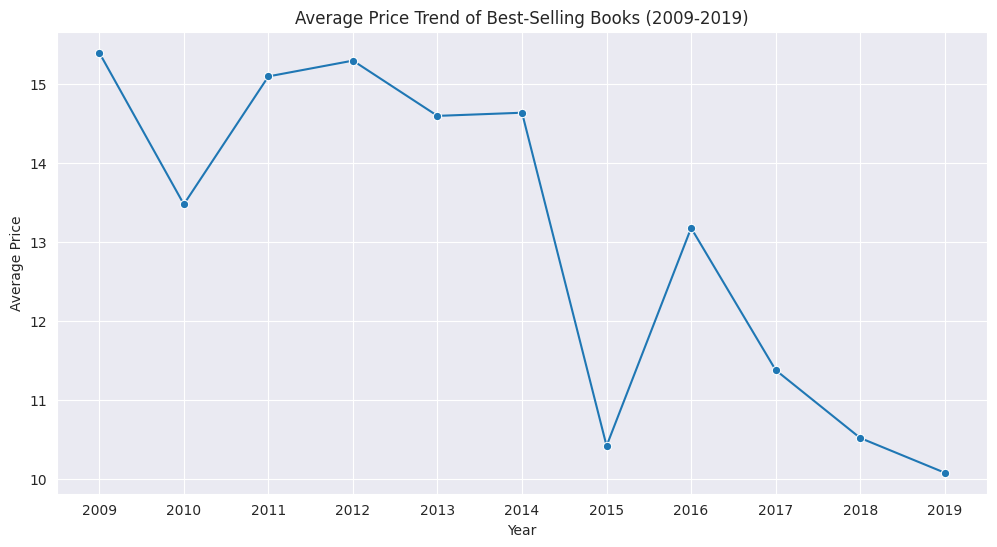

In [23]:
# Calculate the average price per year
average_price_per_year = df.groupby('Year')['Price'].mean()

# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_per_year, marker='o')
plt.title('Average Price Trend of Best-Selling Books (2009-2019)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(df['Year'].unique())  # To ensure all years are displayed
plt.grid(True)
plt.show()


### Analysis of the Trend
There seems to be a slight downshift in book prices in 2009 but this could be due to the great recession, the prices then experience an uplift to somewhere above 15 and for the next couple of years, there's a fluctuation but nothing too major
From the looks of this data it's pretty clear between the years 2009-2013 the prices of books were pretty high and this mainly because of the increased demand of hard copy books. 2014 however we see a massive downshift in the prices and this could be to simply the rise of eBooks.There is an upshift from 2015 however that's quite great however from 2016 the prices kept going down until the hit an all time low in 2019

### Correlation Analysis

In this analysis I will be conducting the relationship between User Ratings, prices and the Number of Reviews 
I'll use pandas to calculate the correlation matrix that will show the correlation coefficients between each pair of variables
I'll then visualize it in an effective way using a heat map

Just a simple explanation on how the results will be interpreted
Correlation coefficients range from -1 to 1 and a value close to 1 implies a strong positive correlation however near -1 indicates a strong negative correlation and around 0 simply implies no correlation

For the color representation, each cell's color indicates the strength and direction of the correlation between two variables. For this heat map I will be using two colors with red representing a strong positive correlation and blue representing a strong negative correlation and the neutral color in-between just simply represents no correlation

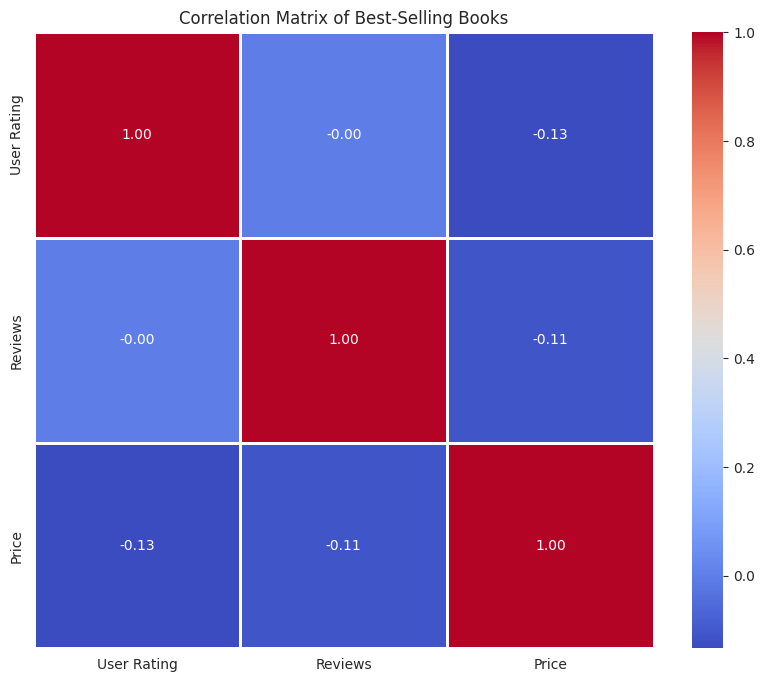

In [24]:
# Calculating the correlation matrix
correlation_matrix = df[['User Rating', 'Reviews', 'Price']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix of Best-Selling Books')
plt.show()


### Analysis of the Heat Map
1. From the heat map we can clearly see we get a negative correlation between Price and User Rating and this indicates that lower priced books tend to have higher ratings
2. There's a a strong negative correlation between reviews and price at (-0.11) on the heat map and this could imply that as the price of books increases the number of reviews tends to decrease and this could be due to so many reasons like cost sensitivity where readers might be more hesitant to purchase higher priced books hence the low reviews
3. There's a weak negative correlation between reviews and user ratings. This means that there's a slight tendency for reviews to have lower user ratings and this could simply be because books that have accumulated a large number of reviews. This attracts a broad spectrum of opinions incfreasing the likelihood of receiving mixed or negative reviews.

### Summarizing Key Findings

Here's a quick recap for the analysis objectives 
1. Genre Popularity
2. User Ratings
3. Distribution of Prices
4. Price Analysis
5. Author Analysis
6. Correlation Analysis

#### Genre Popularity

The bar graph analysis revealed non fictional books outnumbered fictional books and this suggests higher percentage of readers are more interested in non fictional books 

#### Trends in User Ratings

The line graph clearly showed that as the years went on the user satisfaction rates really went up overall and this could be due to better quality publishing that has kept evolving as the years go on

#### Distribution of Prices 

The distribution of prices showed that the majority of the books are quite cheap and affordable mainly due to the competitive prices and this has also contributed to user satisfaction because it gives readers value for their money.

#### Price Analysis

The average price for books keep reducing throughout the years and this could be mainkly due to the rise of eBooks in years

#### Author Analysis

This reavealed that pretty much most of the books had the same authors and this just revealed that the quality of work they've been realizing is great and the readers quite enjoy it.

#### Correlation Analysis

This revealed when prices increase for books review decrease, it revealed cheaper books have higher ratings and that expensive books tend to have less reviews

### Assesement and Methods Used

First off I want to start off with the limitaions 

Data Scope: the analysis only on best-selling books on Amazon which may not represent reading trends and preferences outside specfic markets like markets in Africa for example that don't really use Amazon as much as the western world. 

Timeframe Limitation: The data only covers 2009 upto 2019 and does not reflect changes and trends that may have developed recently as this is from 5years ago which is half the time from when this data is set to have been recorded.

Subjectivity in Ratings: User ratings are subjective and can be influenced by factors beyond the book's content for example marketing campaigns or author popularity for example are book heavily promoted and pushed by influencial people around the world for example Cristiano Ronaldo statiscally will do well because of his large following that consists of over 500million people across all major platforms and his loyal followers will tend to support him hence affecting the ratings 


### Final Thoughts

My Analysis provides insights into the best-selling books on Amaozon and it basically highlights the popularity of non fictional books, evolving of the reader satisfactions and the effects of pricing on customer behaviour. My analysis also highlights the dominance of certain authors suggesting that consistent quality and brand loyalty are important factors in order to achieve best seller status. The trends have also showed the importance of pricing strategies and online platforms like amazon for modern day publishing.

However, I feel like further studies could expand this analysis by incorporating wider ranges of data sources like Barnes and Noble and Books A Million that are well known book stores and are specifically popular as book stores so with their data it would be possible to expand on my analysis like considering more recent trends and exploring different relationship between other variables like publication dates, international sales, reader demographics and publisher information

Also in the future a deeper analysis of the data. Create and justify some new meteric like impact and have it be something like the review score, divided by the number of 'emotional' words (not stop words) and then maybe the number of books sold overall. 
The reasoning for this is that if a book is highly rated, the user has given the review a lot of words describing it, and the total number of books sold was high, then it had a high 'impact'

Inconclusion, exploring Amazon's best sellers was really fun and so engaging but I still remain unclear if lower prices really increase reader's satisfaction and because of the correlation with this trend it makes it clear that a much more comprehensive research is needed

## Citations

Source of data off Kaggle
https://www.kaggle.com/sootersaalu

